In [1]:
import torch
from torch import nn, optim
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, Dataset
import numpy as np

# Use Dataset and DataLoader

### Classes for DataLoader and XOR

In [2]:
class XORDataset(Dataset):
    def __init__(self, X1, X2, y):
        super().__init__()
        self.x1 = X1
        self.x2 = X2
        self.y = y
    def __len__(self):
        return self.x1.shape[0]
    def __getitem__(self, idx):
        return self.x1[idx], self.x2[idx], self.y[idx]

In [3]:
class XORModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(2,2, bias=True)
        self.a1 = nn.Sigmoid()
        self.l2 = nn.Linear(2,1, bias=True)
        self.a2 = nn.Sigmoid()
    def forward(self, X1, X2):
        x = torch.cat((X1, X2), dim=1)
        z = self.l1(x)
        r = self.a1(z)
        z = self.l2(r)
        r = self.a2(z)
        return r

In [4]:
X1 = torch.tensor([0, 0, 1, 1], dtype= torch.float32)
X2 = torch.tensor([0, 1, 0, 1], dtype= torch.float32)
y = torch.tensor([0, 1, 1, 0], dtype= torch.float32)

In [5]:
model = XORModel()

In [6]:
datasetxor = XORDataset(X1=X1, X2=X2, y=y)

In [7]:
dl = DataLoader(dataset=datasetxor, batch_size=datasetxor.__len__(), shuffle=True)

In [8]:
cr = nn.MSELoss()

In [9]:
opt = optim.SGD(model.parameters(), lr=0.001)

In [10]:
losses = []

In [11]:
model.train()

XORModel(
  (l1): Linear(in_features=2, out_features=2, bias=True)
  (a1): Sigmoid()
  (l2): Linear(in_features=2, out_features=1, bias=True)
  (a2): Sigmoid()
)

In [12]:
epochs = int(input("Enter Number of Epochs : "))
epochs

100

In [13]:
for i in range(epochs):
    l1 = 0.0
    for ip1, ip2, op in dl:
        opt.zero_grad()
        out = model.forward(ip1.reshape(-1,1), ip2.reshape(-1,1))
        l1 = cr(out, op)
        l1.backward()
        opt.step()
        losses.append(l1.detach().numpy())
    if i%(epochs/5) == 0:
        print(f"Epoch : {i}\t Loss : {l1.item()}")
        print('-x' * 50 + '-')

Epoch : 0	 Loss : 0.2711179256439209
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-
Epoch : 20	 Loss : 0.2709977328777313
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-
Epoch : 40	 Loss : 0.2708780765533447
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-
Epoch : 60	 Loss : 0.2707590162754059
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-
Epoch : 80	 Loss : 0.27064049243927
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-


/home/king_258/Documents/Torch/.env/lib/python3.12/site-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([4, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


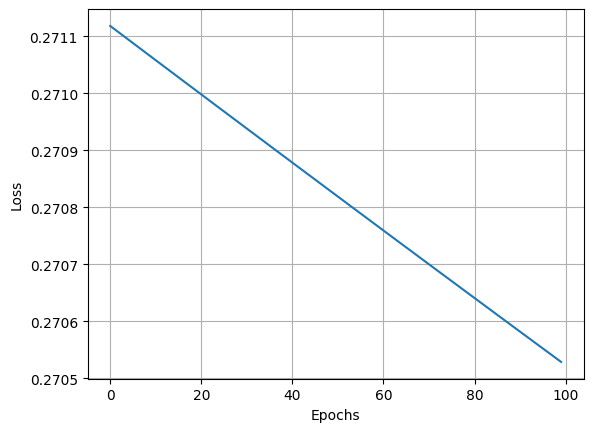

In [ ]:
plt.plot(range(epochs), losses, label = 'Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

In [15]:
torch.save(model.state_dict(), 'Model_XOR.pth')